<a href="https://colab.research.google.com/github/bhaveshpatil18/bhavesh-/blob/main/Machine_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import warnings
warnings.simplefilter('ignore')

import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
print(tf. __version__)

!pip install skillsnetwork
import keras
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from statsmodels.tsa.seasonal import seasonal_decompose
from dateutil.parser import parse
import os
import pathlib
from scipy import signal
from scipy.io import wavfile
import re
import string
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import HashingVectorizer

sns.set_context('notebook')
sns.set_style('white')

2.15.0
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 7.5 MB/s eta 0:00:00


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Example 1 - Working with Speech Commands
In this example, we will walk through how to pre-process audio files in the .WAV format. We will be using a portion of the Speech Commands dataset (Warden, 2018), which contains short (one-second or less) audio clips of commands, such as "down", "go", "left", "no", "right", "stop", "up", and "yes".

Let us start by importing a portion of the Speech Commands dataset. The original dataset consists of over 105,000 audio files in the WAV (Waveform) audio file format of people saying 35 different words.

Exercise A - Import data set
A portion of the dataset is provided by Tensorflow as a .zip file. We have modified it further to include just a few test files.

In [ ]:
!pip install skillsnetwork

Exercise B - Extract audio clips
Start off by listing the commands by reading the names of the eight folders that were created earlier.

In [ ]:
import skillsnetwork

await skillsnetwork.prepare("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML311-Coursera/datasets/mini_speech_commands.zip")

  0%|          | 0/186 [00:00<?, ?it/s]

Saved to '.'


In [ ]:
!mkdir /content/drive/My Drive/mini_speech_commands

mkdir: cannot create directory ‘/content/drive/My’: No such file or directory
mkdir: cannot create directory ‘Drive/mini_speech_commands’: No such file or directory


In [ ]:
!mkdir /content/drive/My Drive/mini_speech_commands

mkdir: cannot create directory ‘/content/drive/My’: No such file or directory
mkdir: cannot create directory ‘Drive/mini_speech_commands’: No such file or directory


In [ ]:
data_dir="mini_speech_commands"

In [ ]:
commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != './data/mini_speech_commands/README.md']
commands

array(['up', 'no', 'left', 'right', 'go', '.DS_Store', 'README.md', 'yes',
       'stop'], dtype='<U9')

Now we will extract the names/paths of the audio clips into a file:

In [ ]:
filenames = tf.io.gfile.glob(str(data_dir) + '/*/*')
filenames

Print out the number of audio clips present.

In [ ]:
num_samples = len(filenames)
print(num_samples)

83


Exercise C - Plotting audio files
Let's plot an audio waveforms by converting it to a numpy array. We will first pick a test file.

In [ ]:
from scipy.io.wavfile import read
test_file_name = '/no/97f4c236_nohash_3.wav'

In [ ]:
#Now use the read function from scipy.io.wavfile to read in the wav file as an array.
rate, test_file = read(data_dir+test_file_name)


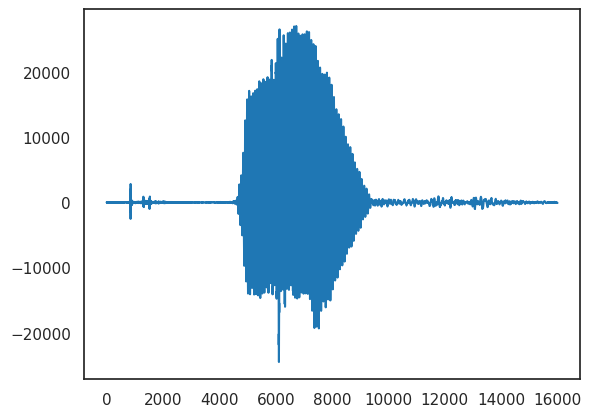

In [ ]:
#Plot the test file.
plt.plot(test_file)

Exercise D - Basic pre-processing
We will learn about audio clip pre-processing. Each .WAV file contains time-series data with a set number of samples per second. Each sample represents the amplitude of the audio signal at that specific time. In this dataset, the sampling rate of each clip is 16kHz.

We will use the tf.audio.decode_wav function to decode the 16-bit WAV files to float tensors, so they are in an easy to use format. The -32768 to 32767 signed 16-bit values will be scaled to -1.0 to 1.0 in float. Let's start off by printing the shape of the tensor returned by tf.audio.decode_wav. It should be [samples, channels], where channels is 1 for mono or 2 for stereo. The Speech Commands dataset only contains mono recordings.

We will first start by reading the test file as a tensor object.

In [ ]:
test_file_tensor = tf.io.read_file(data_dir+'/no/97f4c236_nohash_3.wav')
test_audio, _ = tf.audio.decode_wav(contents=test_file_tensor)


In [ ]:
test_audio, _ = tf.audio.decode_wav(contents=test_file_tensor)
print(test_audio.shape)

(16000, 1)


Exercise E - Spectrogram
Waveforms in this dataset are represented in the time domain.

Let us look into transforming the waveforms from the time-domain signals into the time-frequency-domain signals by converting it to a spectrogram. A spectrogram shows frequency changes over time and can be represented as 2D images. These images can even be used as input to a neural network.

We will use the spectrogram function from scipy to do this.

In [ ]:
frequencies, times, spectrogram = signal.spectrogram(test_file, rate)

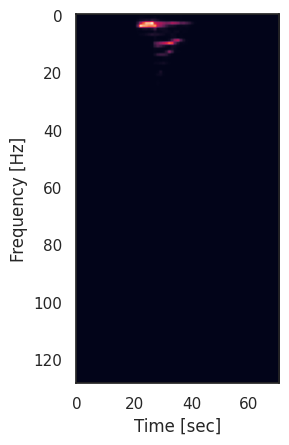

In [ ]:
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
!mkdir /content/drive/My Drive/mini_speech_commands

data_dir="mini_speech_commands"

commands = np.array(tf.io.gfile.listdir(str(data_dir)))
commands = commands[commands != './data/mini_speech_commands/README.md']
commands


mkdir: cannot create directory ‘/content/drive/My’: No such file or directory
mkdir: cannot create directory ‘Drive/mini_speech_commands’: No such file or directory


array(['up', 'no', 'left', 'right', 'go', '.DS_Store', 'README.md', 'yes',
       'stop'], dtype='<U9')

In [ ]:
# prompt: Waveforms in this dataset are represented in the time domain.  Let us look into transforming the waveforms from the time-domain signals into the time-frequency-domain signals by converting it to a spectrogram. A spectrogram shows frequency changes over time and can be represented as 2D images. These images can even be used as input to a neural network.  We will use the spectrogram function from scipy to do this.

frequencies, times, spectrogram = signal.spectrogram(test_file, rate)
plt.pcolormesh(times, frequencies, spectrogram)
plt.imshow(spectrogram)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()


In [ ]:
# prompt: 'ellipsis' object has no attribute 'shape'

test_audio, _ = tf.audio.decode_wav(contents=test_file_tensor)
